In [2]:
import sys
sys.path.append("..")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from global_config import *

## Modifiable Configuration

In [4]:
import os.path as osp
timestamp = "20250325_152821" # no any augmentation, max_iter=8000
# timestamp = "20250325_161117" # RandomFlipWithLabelSwap, max_iter=8000
# timestamp = "20250325_165419" # RandomFlip, max_iter=8000
# timestamp = "20250325_173748" # Normalization, RandomRotate, RandomResize and RandomCrop
# timestamp = "20250325_174924" # PhotoMetricDistortion.

timestamp = "20250325_182527" # Normalization + CE loss
timestamp = "20250325_183833" # Normalization + weighted CE + Lovasz loss(1:2) (decode head:auxiliary heads = 1:0.8)
timestamp = "20250325_190038" # Normalization + Weighte CE + Lovasz loss(1:2) (decode head:auxiliary heads = 1:0.4)
timestamp = "20250325_192653" # Normalization + Weighted CE + Dice loss(1:2) (decode head:auxiliary heads = 1:0.4)
timestamp = "20250325_195939" # Nomalization + Weighted CE + Dice + Lovasz loss(0.2:1:0.3) (decode head:auxiliary heads = 1:0.4)

timestamp = "20250325_202622" # all above augmentations and CE+Dice+Lovasz (0.2:1:0.3) (decode:auxiliary heads = 1:0.4)

log_suffix_path = f"{timestamp}/vis_data/scalars.json"
log_prefix_path = OUT_FASTSCNN_DIR_PATH
#loss_metrics = ['loss', 'decode.loss_ce', "decode.loss_dice", 'aux_0.loss_ce', "aux_0.loss_lovasz", 'aux_1.loss_ce', "aux_1.loss_lovasz"]
loss_metrics = ['loss', 'decode.loss_ce', "decode.loss_lovasz", 'aux_0.loss_ce', "aux_0.loss_lovasz", "aux_0.loss_dice",\
    'aux_1.loss_ce', "aux_1.loss_lovasz", "aux_1.loss_dice"]
acc_metrics = ["decode.acc_seg", "aux_0.acc_seg", "aux_1.acc_seg"]
val_metrics = ["aAcc", "mFscore", "mIoU", "mPrecision", "mRecall", "mAcc", "mDice"]

In [5]:
log_path = osp.join(log_prefix_path, log_suffix_path)
log_vis_res_saving_prefix_path = osp.join(osp.dirname(osp.dirname(log_path)), "vis_res")
if not osp.exists(log_vis_res_saving_prefix_path):
    os.makedirs(log_vis_res_saving_prefix_path)
log_path, log_vis_res_saving_prefix_path

('/home/featurize/work/AI6126project1/out/fastscnn/20250325_202622/vis_data/scalars.json',
 '/home/featurize/work/AI6126project1/out/fastscnn/20250325_202622/vis_res')

In [6]:
with open(log_path, "r") as f:
    json_list = f.readlines()
type(json_list), len(json_list)

(list, 192)

In [7]:
eval(json_list[0])

{'lr': 0.11993322820401885,
 'data_time': 0.017018580436706544,
 'loss': 0.9753254175186157,
 'decode.loss_ce': 0.19659076035022735,
 'decode.loss_dice': 0.27454385757446287,
 'decode.loss_lovasz': 0.2559006869792938,
 'decode.acc_seg': 75.61135864257812,
 'aux_0.loss_ce': 0.046297330781817435,
 'aux_0.loss_dice': 0.04116242527961731,
 'aux_0.loss_lovasz': 0.023856512270867825,
 'aux_0.acc_seg': 68.4311752319336,
 'aux_1.loss_ce': 0.05780442878603935,
 'aux_1.loss_dice': 0.05478161424398422,
 'aux_1.loss_lovasz': 0.024387798644602297,
 'aux_1.acc_seg': 61.43075180053711,
 'time': 0.3346735954284668,
 'iter': 100,
 'memory': 5975,
 'step': 100}

In [8]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
for each in json_list: #?json_list[:-1]
    if "aAcc" in each:
        df_val = df_val.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [9]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.loss_dice,decode.loss_lovasz,decode.acc_seg,aux_0.loss_ce,aux_0.loss_dice,aux_0.loss_lovasz,aux_0.acc_seg,aux_1.loss_ce,aux_1.loss_dice,aux_1.loss_lovasz,aux_1.acc_seg,time,iter,memory,step
0,0.119933,0.017019,0.975325,0.196591,0.274544,0.255901,75.611359,0.046297,0.041162,0.023857,68.431175,0.057804,0.054782,0.024388,61.430752,0.334674,100.0,5975.0,100.0
1,0.119866,0.017640,0.804624,0.149570,0.199350,0.239166,80.444550,0.036284,0.032386,0.023174,77.235802,0.051627,0.048852,0.024216,61.052658,0.340324,200.0,5975.0,200.0
2,0.119798,0.019669,0.674938,0.117527,0.155661,0.204540,82.354866,0.031187,0.026418,0.021937,76.709602,0.048580,0.045099,0.023989,70.021347,0.346977,300.0,5968.0,300.0
3,0.119731,0.019787,0.561903,0.092483,0.128504,0.158725,81.581169,0.026098,0.023730,0.021334,80.060150,0.044249,0.042939,0.023842,62.536282,0.341070,400.0,5973.0,400.0
4,0.119663,0.014396,0.530550,0.085872,0.120210,0.144871,86.439644,0.025206,0.021855,0.020924,83.238457,0.045542,0.042348,0.023721,69.796135,0.331050,500.0,5970.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.109426,0.022629,0.251014,0.027769,0.039859,0.075785,95.657669,0.008531,0.008435,0.011265,92.653015,0.031680,0.029420,0.018268,79.668610,0.353002,15600.0,5975.0,15600.0
156,0.109358,0.018825,0.246922,0.027763,0.040543,0.073401,94.105118,0.008353,0.008369,0.011053,91.104393,0.030789,0.028460,0.018191,71.521751,0.340858,15700.0,5975.0,15700.0
157,0.109290,0.013265,0.247413,0.028237,0.040887,0.073685,94.639168,0.008395,0.008450,0.010937,91.643501,0.030695,0.028132,0.017995,75.126831,0.330767,15800.0,5974.0,15800.0
158,0.109222,0.017004,0.234788,0.027046,0.038903,0.068357,94.965813,0.008373,0.008331,0.010740,91.869476,0.028599,0.026946,0.017492,81.301445,0.336298,15900.0,5971.0,15900.0


In [10]:
df_val["mFscore_4_mean"] = df_val["mFscore"].rolling(window=4, min_periods=1).mean()
df_val["mIoU_4_mean"] = df_val["mIoU"].rolling(window=4, min_periods=1).mean()

In [11]:
best_mFscore_idx = df_val["mFscore"].idxmax() 
best_mFscore_idx, df_val.iloc[best_mFscore_idx]["mFscore"], df_val.iloc[best_mFscore_idx]["mIoU"], df_val.iloc[best_mFscore_idx]["mAcc"], df_val.iloc[best_mFscore_idx]["mDice"]

(20, 83.17, 68.78, 77.08, 78.79)

In [12]:
df_val

,aAcc,mFscore,mPrecision,mRecall,mIoU,mAcc,mDice,data_time,time,step,mFscore_4_mean,mIoU_4_mean
0,83.95,65.14,72.35,60.16,46.97,60.16,58.28,0.005800,0.013557,500.0,65.140000,46.970000
1,88.04,75.55,77.39,70.43,59.01,70.43,71.57,0.001943,0.008918,1000.0,70.345000,52.990000
2,87.85,77.81,76.35,75.53,61.88,75.53,73.71,0.001947,0.008574,1500.0,72.833333,55.953333
3,89.31,78.25,79.31,74.07,62.57,74.07,74.13,0.001973,0.009076,2000.0,74.187500,57.607500
4,89.30,78.68,80.47,73.54,63.07,73.54,74.54,0.001882,0.008607,2500.0,77.572500,61.632500
5,91.21,81.66,83.58,75.92,66.70,75.92,77.36,0.001861,0.008600,3000.0,79.100000,63.555000
6,90.07,79.89,81.74,75.09,64.64,75.09,75.69,0.002226,0.009920,3500.0,79.620000,64.245000
7,90.56,80.26,81.82,75.96,65.10,75.96,76.04,0.001923,0.008748,4000.0,80.122500,64.877500
8,90.23,80.74,81.88,76.31,65.60,76.31,76.49,0.001738,0.008176,4500.0,80.637500,65.510000
9,90.69,81.67,82.85,77.24,66.59,77.24,77.37,0.001815,0.008440,5000.0,80.640000,65.482500


### trainning and validation csv

In [13]:
df_train.to_csv(osp.join(log_vis_res_saving_prefix_path, "train_log.csv"), index=False)
df_val.to_csv(osp.join(log_vis_res_saving_prefix_path, "val_log.csv"), index=False)

In [14]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

### training loss

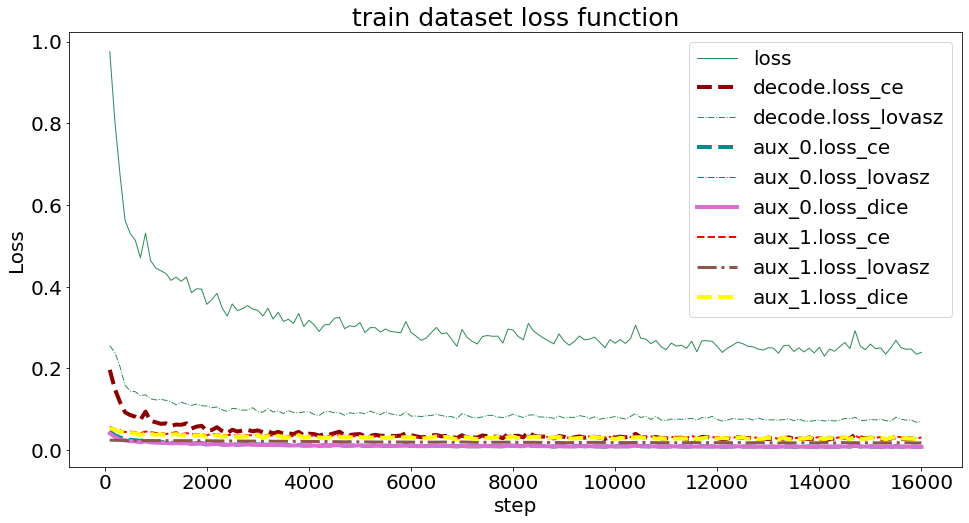

In [15]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in loss_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('train dataset loss function', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "tran_loss.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### train accuracy

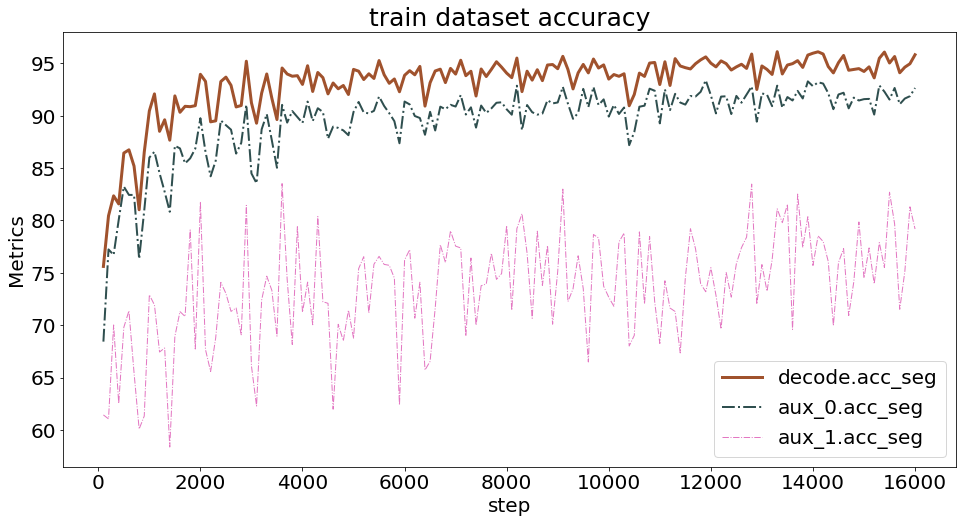

In [16]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in acc_metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('train dataset accuracy', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "train_accuracy.jpg"), dpi=120, bbox_inches='tight')

plt.show()

### validation metrics

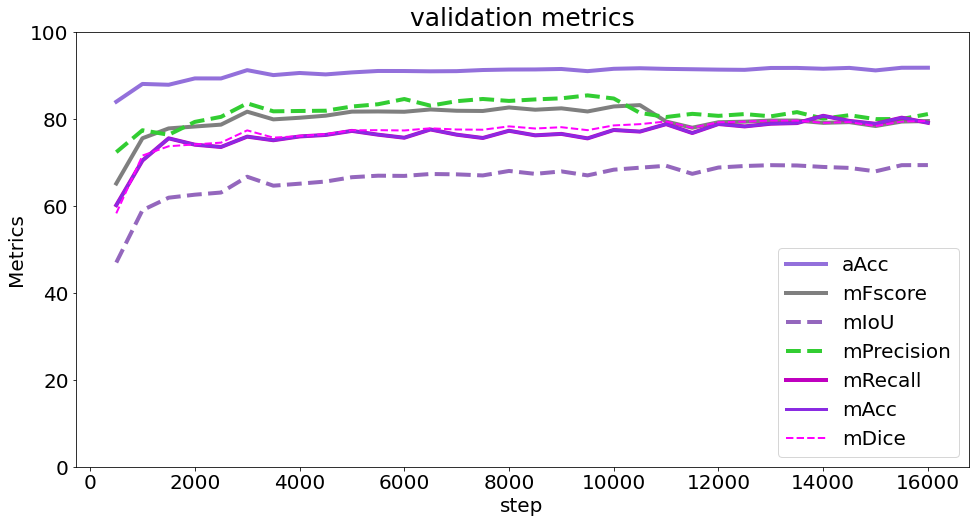

In [17]:
plt.figure(figsize=(16, 8))

x = df_val['step']
for y in val_metrics:
    try:
        plt.plot(x, df_val[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('validation metrics', fontsize=25)

plt.legend(fontsize=20)

plt.savefig(osp.join(log_vis_res_saving_prefix_path, "val_metrics.jpg"), dpi=120, bbox_inches='tight')

plt.show()